In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing as pp

In [7]:
from keras.datasets import mnist

In [8]:
(X_train,y_train) , (X_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [9]:
X_train.shape , y_train.shape

((60000, 28, 28), (60000,))

In [10]:
X_test.shape , y_test.shape

((10000, 28, 28), (10000,))

In [12]:
# X_Train 은 3차원 배열
# 한개의 이미지는 2차원 배열
# 한개의 이미지 2차원 배열 -> 1차원 배열
# ( 60000 , 28 , 28) -> ( 60000 , 784)

X_train = X_train.reshape(-1,784)
#X_train = X_train.reshape(60000,784)
X_test = X_test.reshape(-1,784)
#X_test = X_test.reshape(10000,784)

In [13]:
X_train.shape , X_test.shape


((60000, 784), (10000, 784))

> DataFrame 으로 자료형 변환

In [14]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

In [21]:
y_train.value_counts()

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
dtype: int64

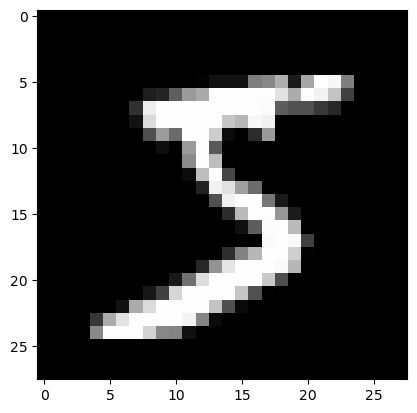

In [23]:
plt.imshow(X_train.loc[0,:].values.reshape(28,28),cmap=plt.get_cmap('gray'))

In [22]:
X_train.loc[0,:].values.reshape(28,28)

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [24]:
def view_digit(example):
    label = y_train.loc[example]
    image = X_train.loc[example,:].values.reshape(28,28)
    plt.title(f'Example : {example}, Label : {label}')
    plt.imshow(image,cmap=plt.get_cmap('gray'))

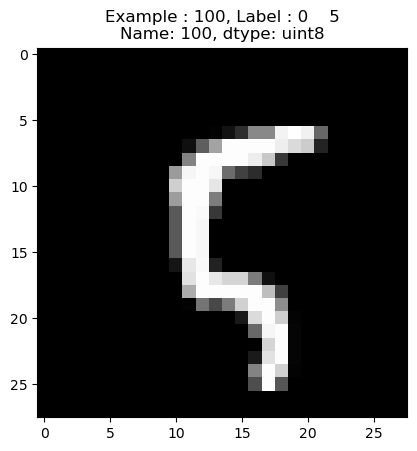

In [25]:
view_digit(100)

- PCA 적용

In [26]:
from sklearn.decomposition import PCA
pca = PCA(n_components=784,random_state=2018)
X_train_PCA = pca.fit_transform(X_train)
X_train_PCA = pd.DataFrame(X_train_PCA)
X_train_PCA.shape